In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os, sys

In [2]:
from glob import glob
from pprint import pprint

# get datasets inputs and targets
curdir = os.getcwd()
data_folder = os.path.join(curdir,'Data\\Compiled_Data')
files = glob(os.path.join(data_folder, '*dataset*'))
pprint(files)

['D:\\Data_Science\\Anomaly_Detection\\tico\\Data\\Compiled_Data\\dataset0.csv',
 'D:\\Data_Science\\Anomaly_Detection\\tico\\Data\\Compiled_Data\\dataset1.csv',
 'D:\\Data_Science\\Anomaly_Detection\\tico\\Data\\Compiled_Data\\dataset2.csv',
 'D:\\Data_Science\\Anomaly_Detection\\tico\\Data\\Compiled_Data\\dataset3.csv']


In [3]:
df_list = []
for file in files:
    df = pd.read_csv(file, index_col=0)
    df_list.append(df)
    
#print(len(df_list))
dataset_df = pd.concat(df_list, sort=False, ignore_index=True)
print(dataset_df.shape)
dataset_df.head()

(107569, 286)


,File_No,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,...,tiebar_mae,Part,Die,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect
0,B1012-278-1AF10005,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,...,0.035002,B1012-278-1,1,2018-01-15,1,5,0,0,0,0
1,B1012-278-1AF10006,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,...,0.035812,B1012-278-1,1,2018-01-15,1,6,0,0,0,0
2,B1012-278-1AF10007,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,...,0.037235,B1012-278-1,1,2018-01-15,1,7,0,0,0,0
3,B1012-278-1AF10008,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,...,0.037237,B1012-278-1,1,2018-01-15,1,8,0,0,0,0
4,B1012-278-1AF10009,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,...,0.039074,B1012-278-1,1,2018-01-15,1,9,0,0,0,0


In [4]:
dataset_df.Cast_date = pd.to_datetime(dataset_df.Cast_date)
dataset_df.Cast_date.describe()

count                  107569
unique                    121
top       2018-03-13 00:00:00
freq                     1539
first     2018-01-15 00:00:00
last      2019-02-28 00:00:00
Name: Cast_date, dtype: object

In [5]:
TS_dataset_df = dataset_df.drop(['File_No', 'Die', 'Cast_date', 'Shift', 'Shot_no', 'dayOfWeek'], axis=1)
TS_dataset_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en12,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,cav1_defect,cav2_defect,defect
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.311415,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,0,0,0
1,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.312217,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,0,0,0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.312139,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,0,0,0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.322637,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,0,0,0
4,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.317911,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,0,0,0


In [6]:
TS_dataset_df.Part.unique()

array(['B1012-278-1', 'B1022-278-1', 'B1012-278-3', 'B1012-278-4',
       'B1012-278-2'], dtype=object)

In [7]:
features_df = TS_dataset_df.drop(['cav1_defect', 'cav2_defect', 'defect'], axis=1)
features_df = pd.get_dummies(features_df)
features = features_df.values
cav1_target = TS_dataset_df.cav1_defect.values
cav2_target = TS_dataset_df.cav2_defect.values
target = TS_dataset_df.defect.values
print('features shape:', features.shape)
print('labels shape:', target.shape)
features_df.head()

features shape: (107569, 281)
labels shape: (107569,)


,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part_B1012-278-1,Part_B1012-278-2,Part_B1012-278-3,Part_B1012-278-4,Part_B1022-278-1
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.483169,-0.611454,-0.387602,0.002732,0.035002,1,0,0,0,0
1,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.477430,-0.606745,-0.379443,0.002792,0.035812,1,0,0,0,0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.474928,-0.604088,-0.373460,0.002860,0.037235,1,0,0,0,0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.462039,-0.586925,-0.352818,0.002696,0.037237,1,0,0,0,0
4,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.443705,-0.595761,-0.323802,0.002910,0.039074,1,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features.shape)

(107569, 281)


Total variance captured: 45.55%


Text(0, 0.5, 'Cumulative Variance')

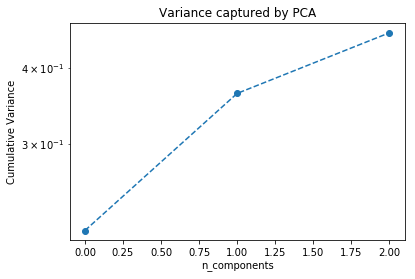

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformed_features = pca.fit_transform(scaled_features)

print('Total variance captured: {:.2f}%'.format(pca.explained_variance_ratio_.cumsum()[-1]*100))
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')
plt.title('Variance captured by PCA')
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance')
#core3_headPress_trans = pca_core3_headPress.fit_transform(core3_headPress_scaled)
#plt.semilogy(pca_core3_headPress.explained_variance_ratio_.cumsum(), '--o')

In [10]:
    transformed_features_df = pd.DataFrame(data=transformed_features, 
                                           columns=['PCA {}'.format(i+1) for i in range(transformed_features.shape[1])])
transformed_features_df['Part'] = dataset_df.Part.values
transformed_features_df['Shift'] = dataset_df.Shift.values
transformed_features_df['Shot_no'] = dataset_df.Shot_no.values
transformed_features_df['Cast_date'] = dataset_df.Cast_date.values
transformed_features_df['cav1_defect'] = cav1_target
transformed_features_df['cav2_defect'] = cav2_target
transformed_features_df['total_defect'] = target
transformed_features_df.head()

,PCA 1,PCA 2,PCA 3,Part,Shift,Shot_no,Cast_date,cav1_defect,cav2_defect,total_defect
0,10.346776,-17.548365,35.606346,B1012-278-1,1,5,2018-01-15,0,0,0
1,11.722525,-17.589626,30.689237,B1012-278-1,1,6,2018-01-15,0,0,0
2,12.834981,-17.882897,30.071182,B1012-278-1,1,7,2018-01-15,0,0,0
3,8.796380,2.802647,8.203819,B1012-278-1,1,8,2018-01-15,0,0,0
4,10.998812,2.626416,3.547234,B1012-278-1,1,9,2018-01-15,0,0,0


In [11]:
%pylab
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


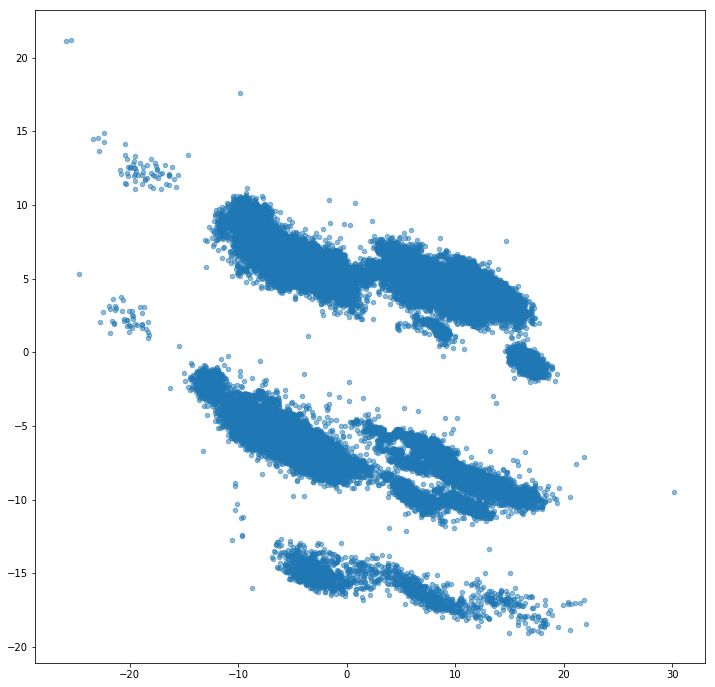

In [12]:
#fig, ax = plt.subplots(1,1, figsize=(12,8), projection='3d')
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter(transformed_features[:,0], transformed_features[:,1], transformed_features[:, 2])
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.scatter(transformed_features[:,0], transformed_features[:, 1], alpha=0.5, s=20)

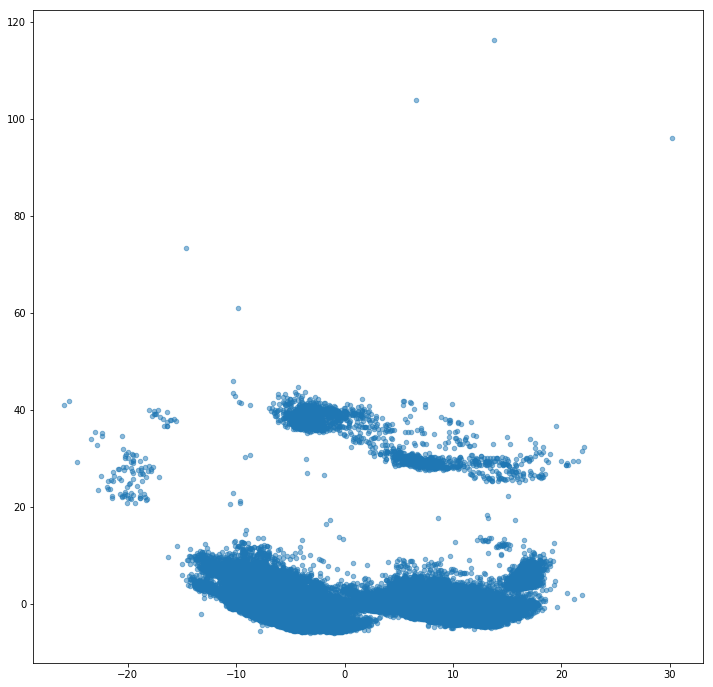

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.scatter(transformed_features[:,0], transformed_features[:, 2], alpha=0.5, s=20)

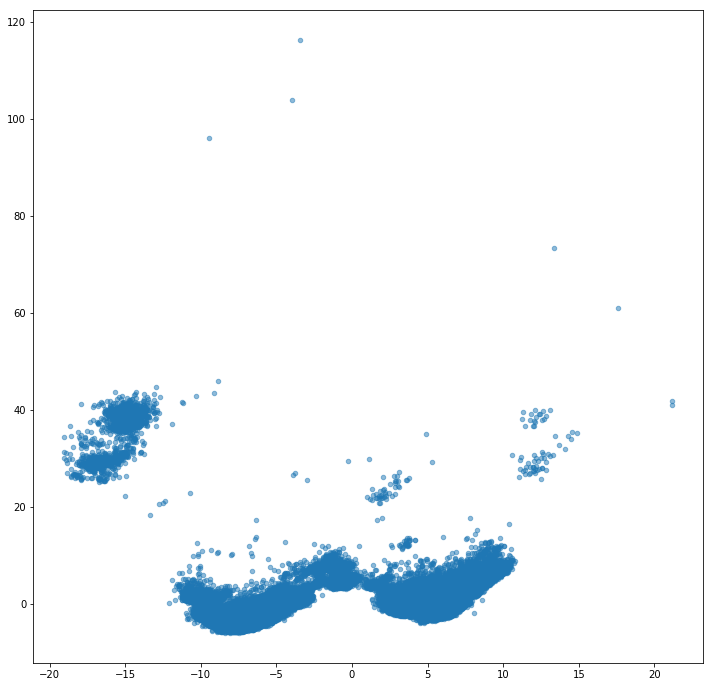

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.scatter(transformed_features[:,1], transformed_features[:, 2], alpha=0.5, s=20)

In [15]:
def plot_parts(x=0, y=1):
    df_dict = {}
    part_list = transformed_features_df.Part.unique()
    for part in part_list:
        df_dict[part] = transformed_features_df[transformed_features_df.Part == part].copy()

    n_keys = len(part_list)
    data = tuple([df_dict[part_list[i]] for i in range(n_keys)])
    colors = tuple(['C{}'.format(i) for i in range(n_keys)])
    group = tuple([part_list[i] for i in range(n_keys)])
    #print(data, colors, group)
    # create plot
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    for data_df, color, group in zip(data, colors, group):
        x_data = data_df.iloc[:, x].values
        y_data = data_df.iloc[:, y].values
        ax.scatter(x_data, y_data, alpha=0.5, c=color, s=20, label=group)
        
    plt.title('Parts distribution')
    plt.xlabel('PCA {}'.format(x))
    plt.ylabel('PCA {}'.format(y))
    plt.legend(loc='best')

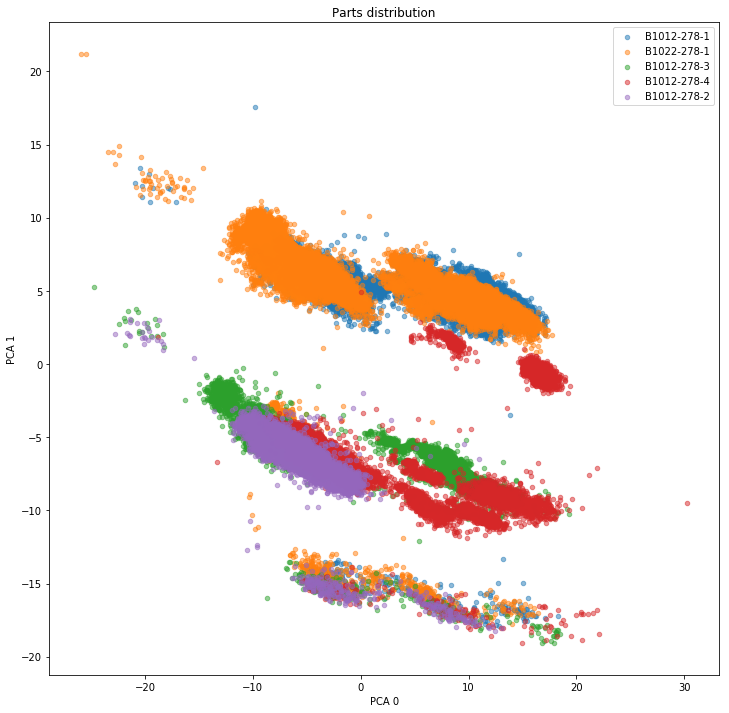

In [16]:
plot_parts(0, 1)

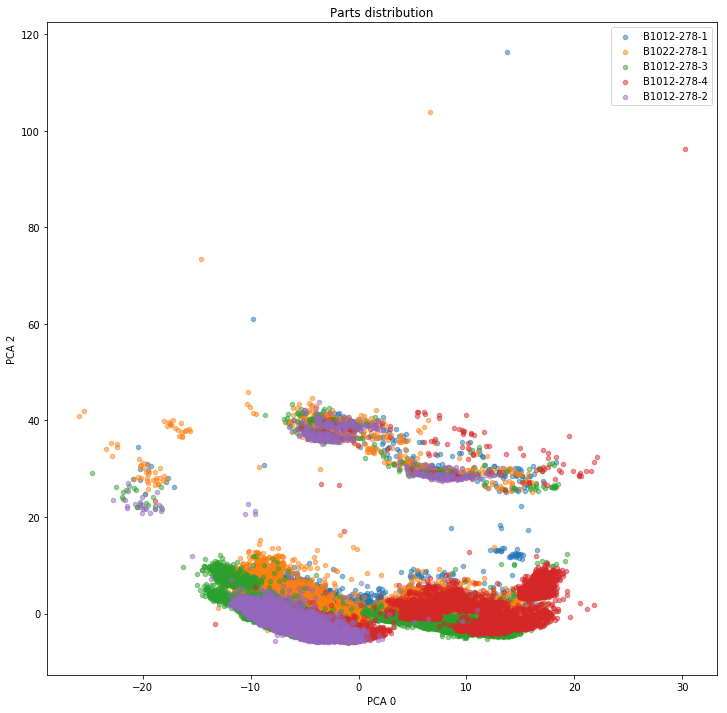

In [17]:
plot_parts(0, 2)

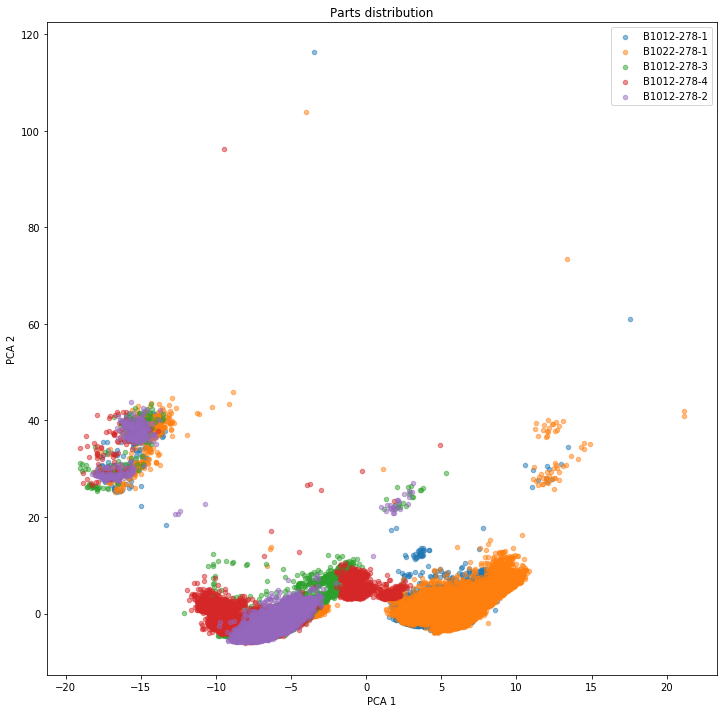

In [19]:
plot_parts(1, 2)

In [20]:
def plot_targets(df, x=0, y=1, target='total_defect'):
    sub_df0 = df[df[target] == 0]
    sub_df1 = df[df[target] == 1]
    data = (sub_df0, sub_df1)
    colors = ('C0', 'C1')
    group = ('good', 'defect')
    # create plot
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    for data_df, color, group in zip(data, colors, group):
        x_data = data_df.iloc[:, x].values
        y_data = data_df.iloc[:, y].values
        ax.scatter(x_data, y_data, alpha=0.5, c=color, s=20, label=group)
        
    plt.title(target+' distribution')
    plt.legend(loc='best')

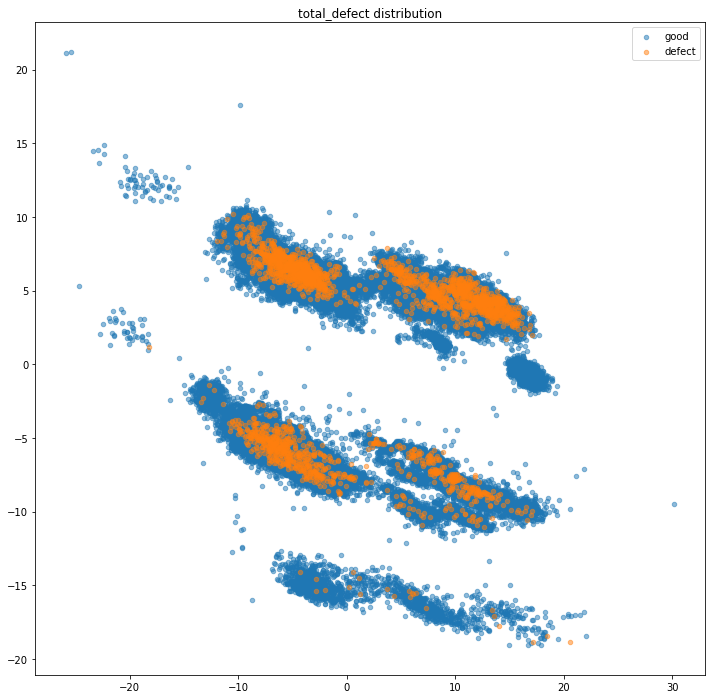

In [21]:
plot_targets(transformed_features_df, 0, 1)

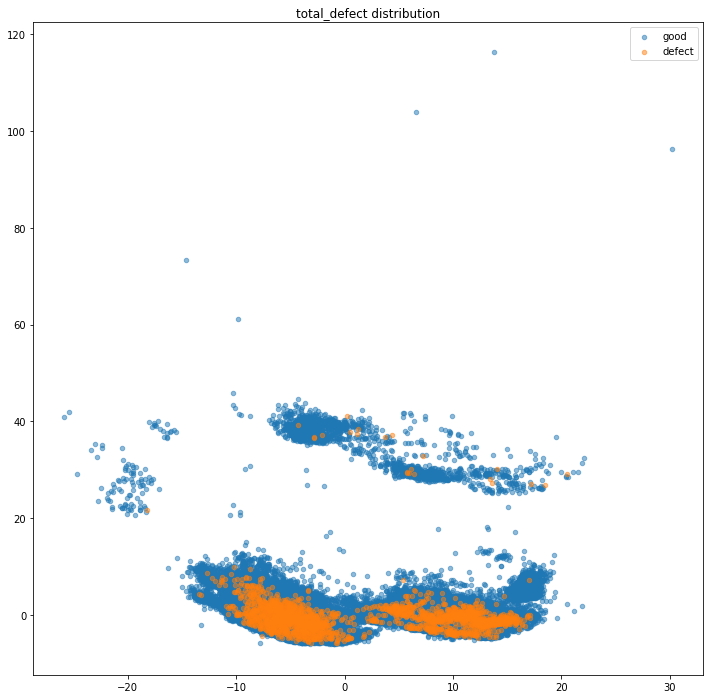

In [22]:
plot_targets(transformed_features_df, 0, 2)

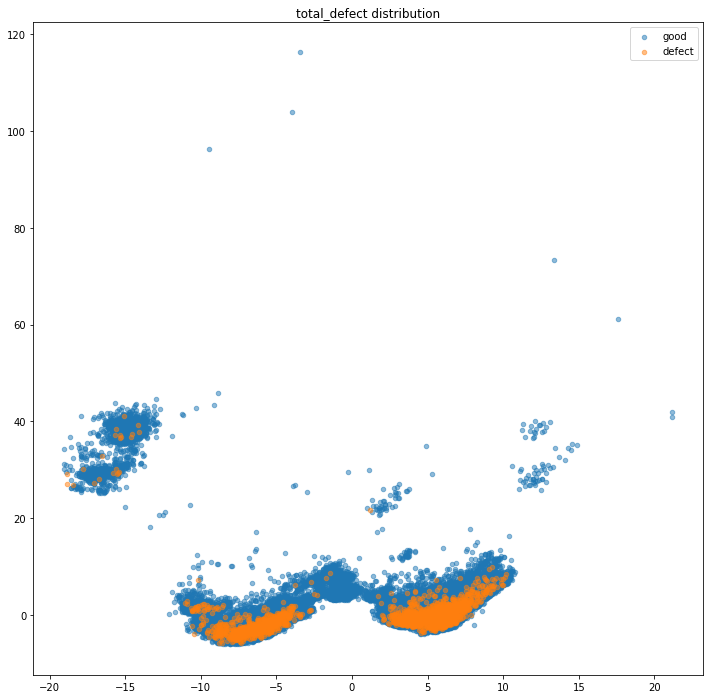

In [23]:
plot_targets(transformed_features_df, 1, 2)

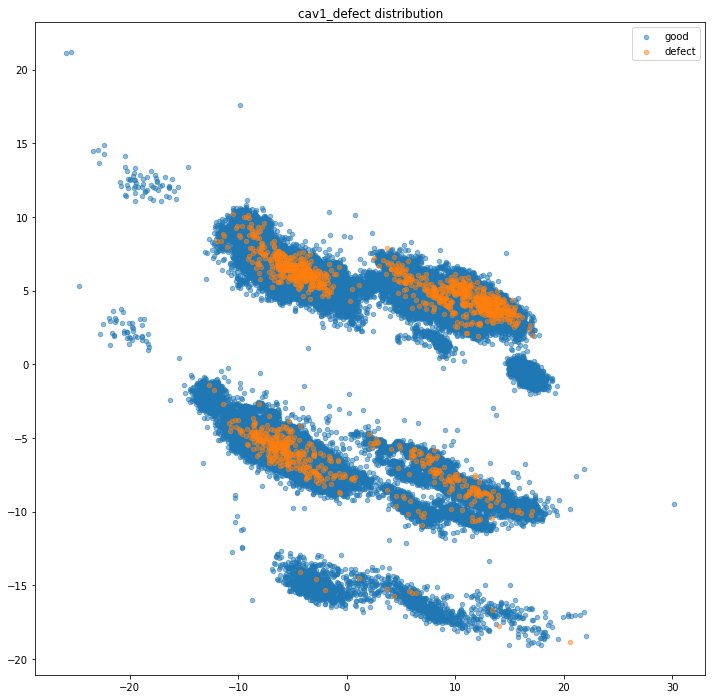

In [24]:
plot_targets(transformed_features_df, 0, 1, 'cav1_defect')

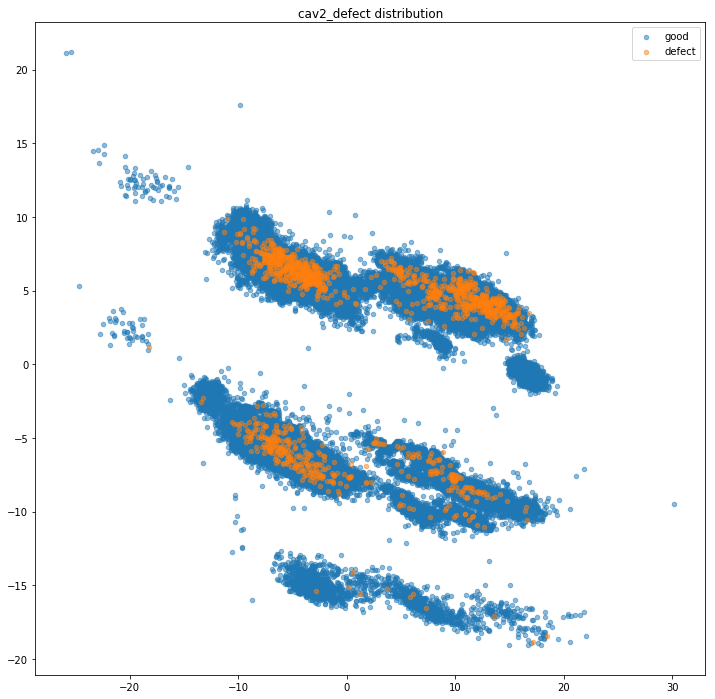

In [25]:
plot_targets(transformed_features_df, 0, 1, 'cav2_defect')

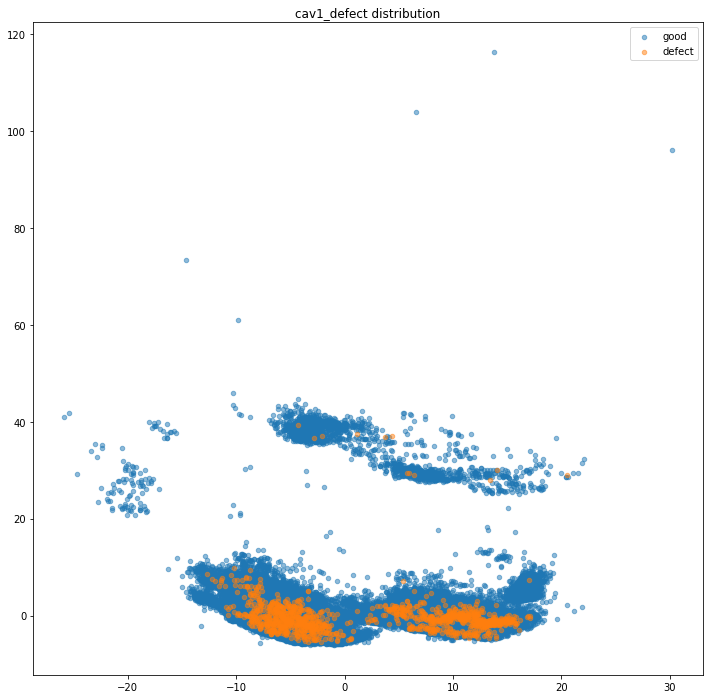

In [26]:
plot_targets(transformed_features_df, 0, 2, 'cav1_defect')

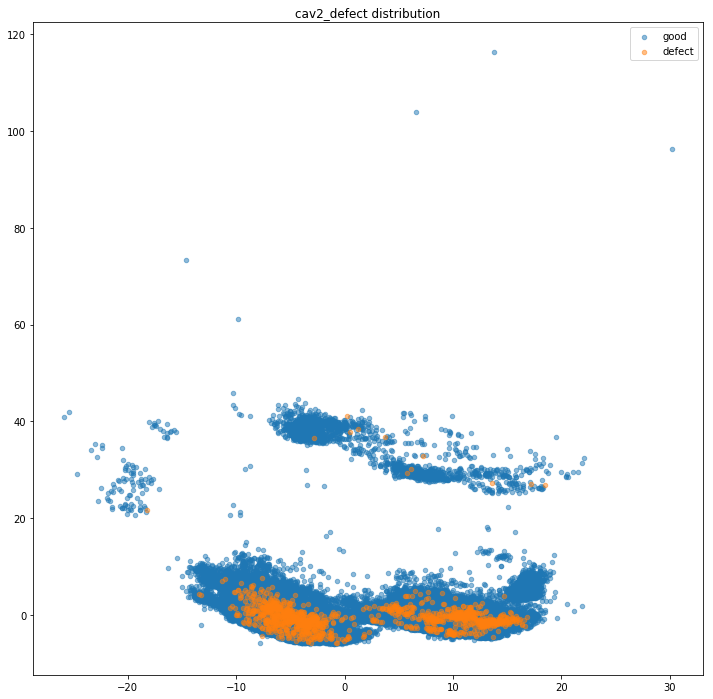

In [27]:
plot_targets(transformed_features_df, 0, 2, 'cav2_defect')

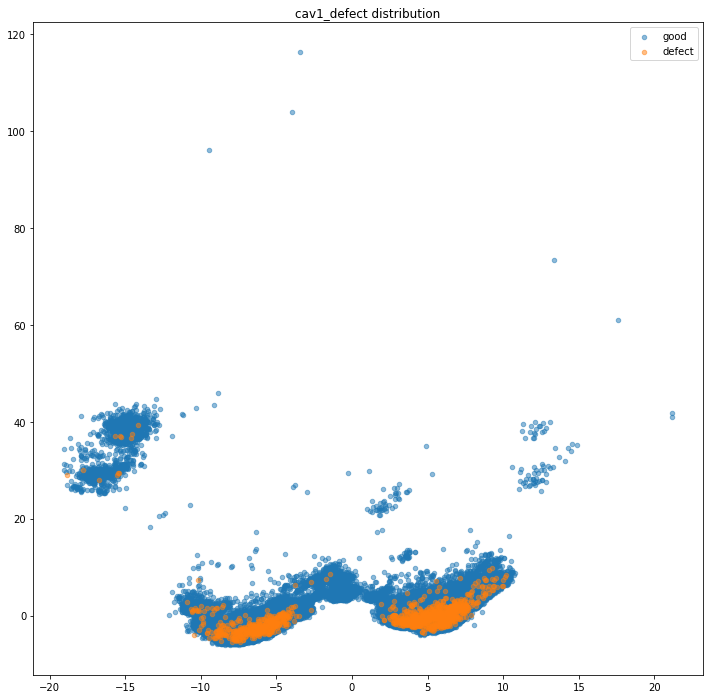

In [28]:
plot_targets(transformed_features_df, 1, 2, 'cav1_defect')

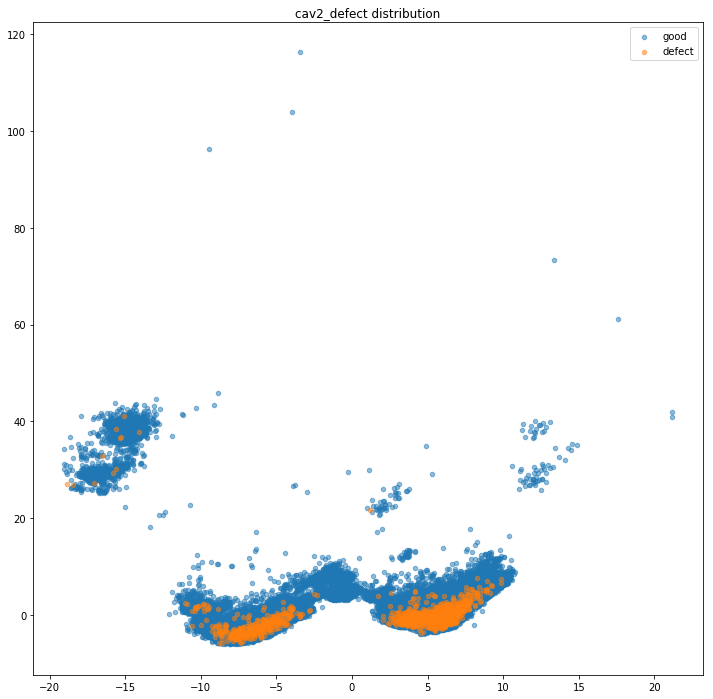

In [29]:
plot_targets(transformed_features_df, 1, 2, 'cav2_defect')

Looks like Cavity 1 and Cavity 2 are from the same distribution

In [30]:
transformed_features_df.Part.unique()

array(['B1012-278-1', 'B1022-278-1', 'B1012-278-3', 'B1012-278-4',
       'B1012-278-2'], dtype=object)

In [31]:
def plot_individual_parts(df, part='B1012-278-1', target='total_defect'):
    sub_df = df[df.Part == part]
    sub_df0 = sub_df[sub_df[target] == 0]
    sub_df1 = sub_df[sub_df[target] == 1]
    data = (sub_df0, sub_df1)
    colors = ('C0', 'C1')
    group = ('good', 'defect')
    # create plot
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,24))
    for data_df, color, group in zip(data, colors, group):
        x1 = data_df.iloc[:, 0].values
        y1 = data_df.iloc[:, 1].values
        x2 = data_df.iloc[:, 0].values
        y2 = data_df.iloc[:, 2].values
        x3 = data_df.iloc[:, 1].values
        y3 = data_df.iloc[:, 2].values
        ax1.scatter(x1, y1, alpha=0.5, c=color, s=20, label=group)
        ax1.set_xlabel('PCA 0')
        ax1.set_ylabel('PCA 1')
        ax1.legend(loc='best')
        ax2.scatter(x2, y2, alpha=0.5, c=color, s=20, label=group)
        ax2.set_xlabel('PCA 0')
        ax2.set_ylabel('PCA 2')
        ax2.legend(loc='best')
        ax3.scatter(x3, y3, alpha=0.5, c=color, s=20, label=group)
        ax3.set_xlabel('PCA 1')
        ax3.set_ylabel('PCA 2')
        ax3.legend(loc='best')
        
    fig.suptitle(part+' defect distribution')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

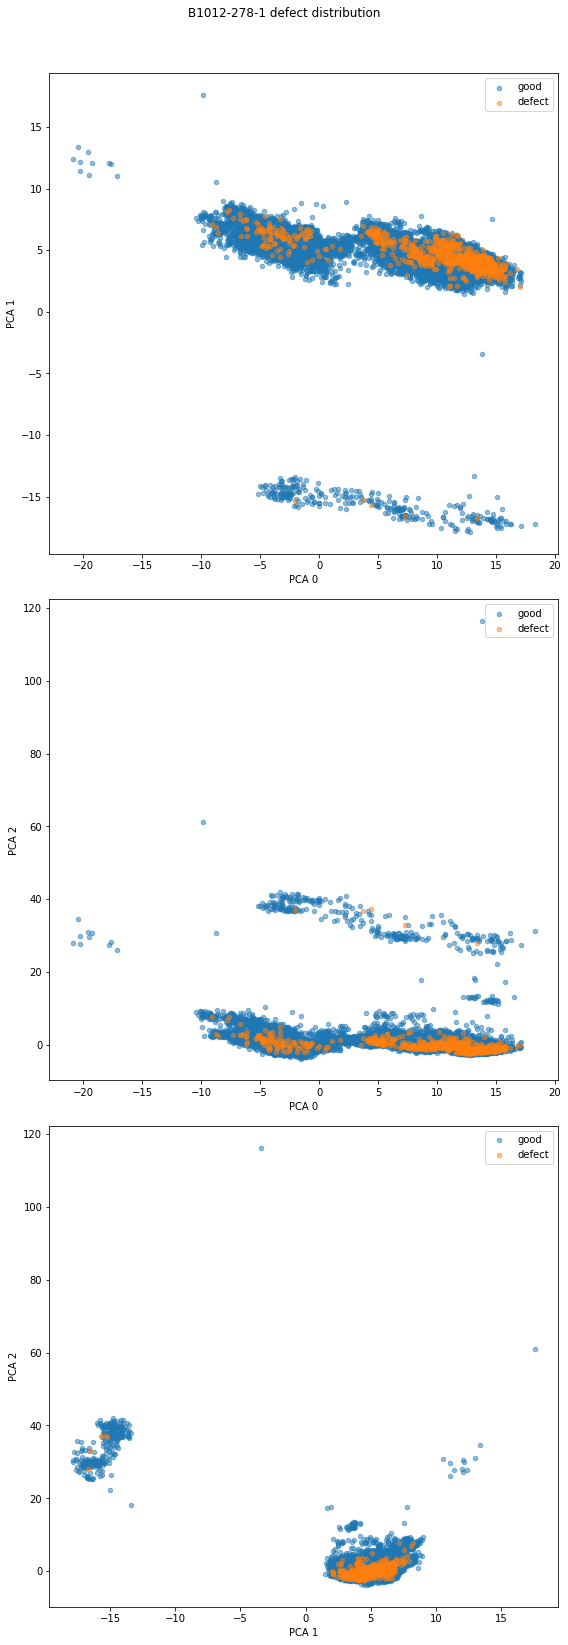

In [32]:
plot_individual_parts(transformed_features_df)

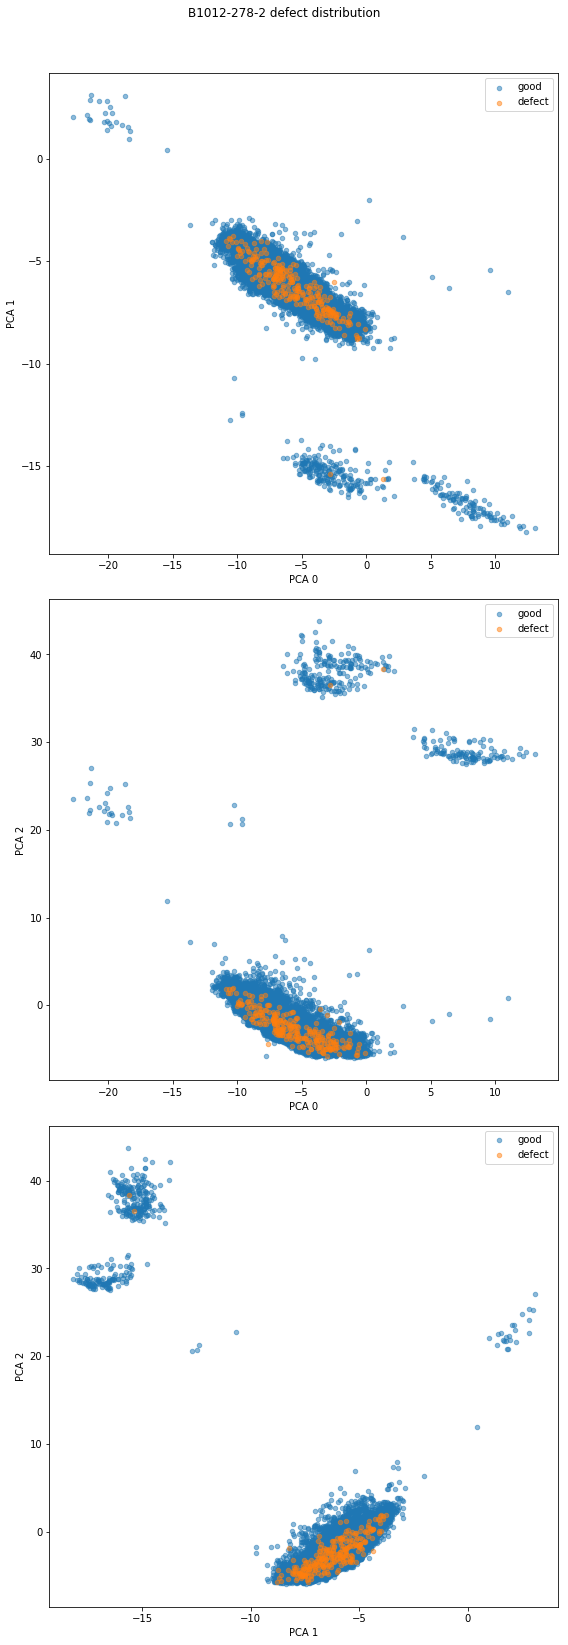

In [33]:
plot_individual_parts(transformed_features_df, part='B1012-278-2')

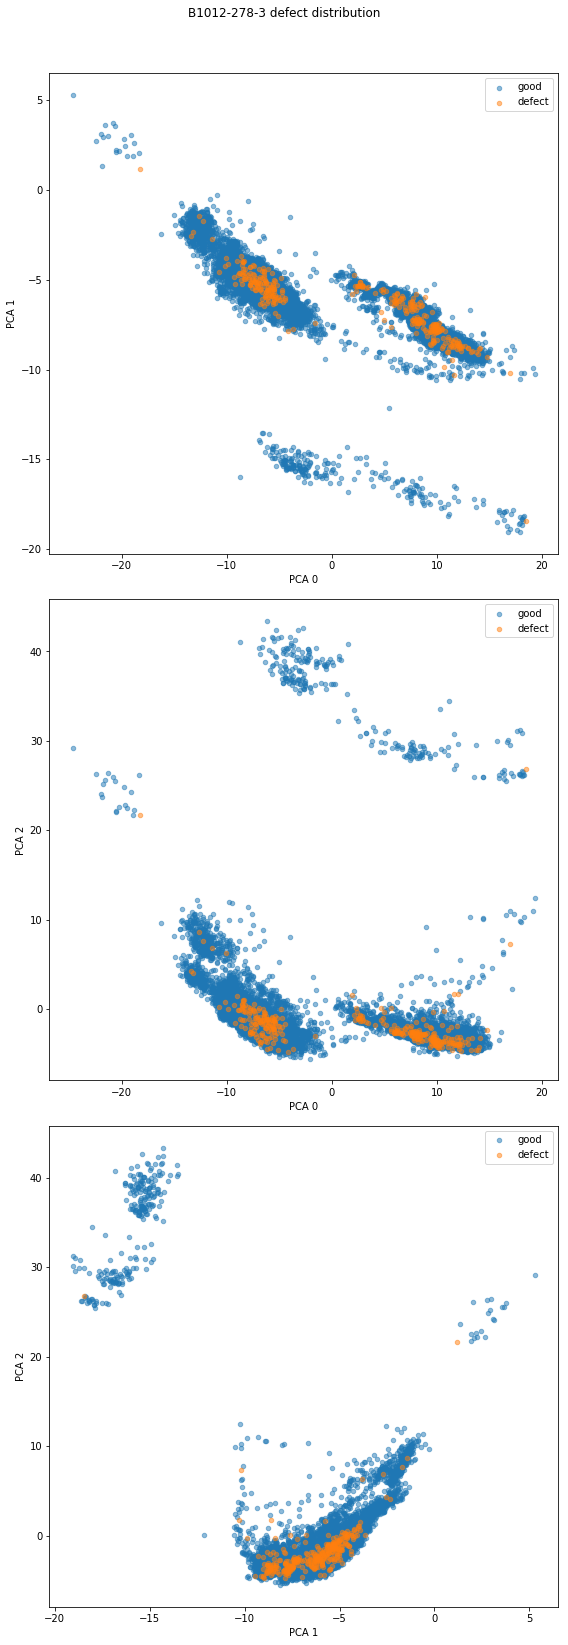

In [34]:
plot_individual_parts(transformed_features_df, part='B1012-278-3')

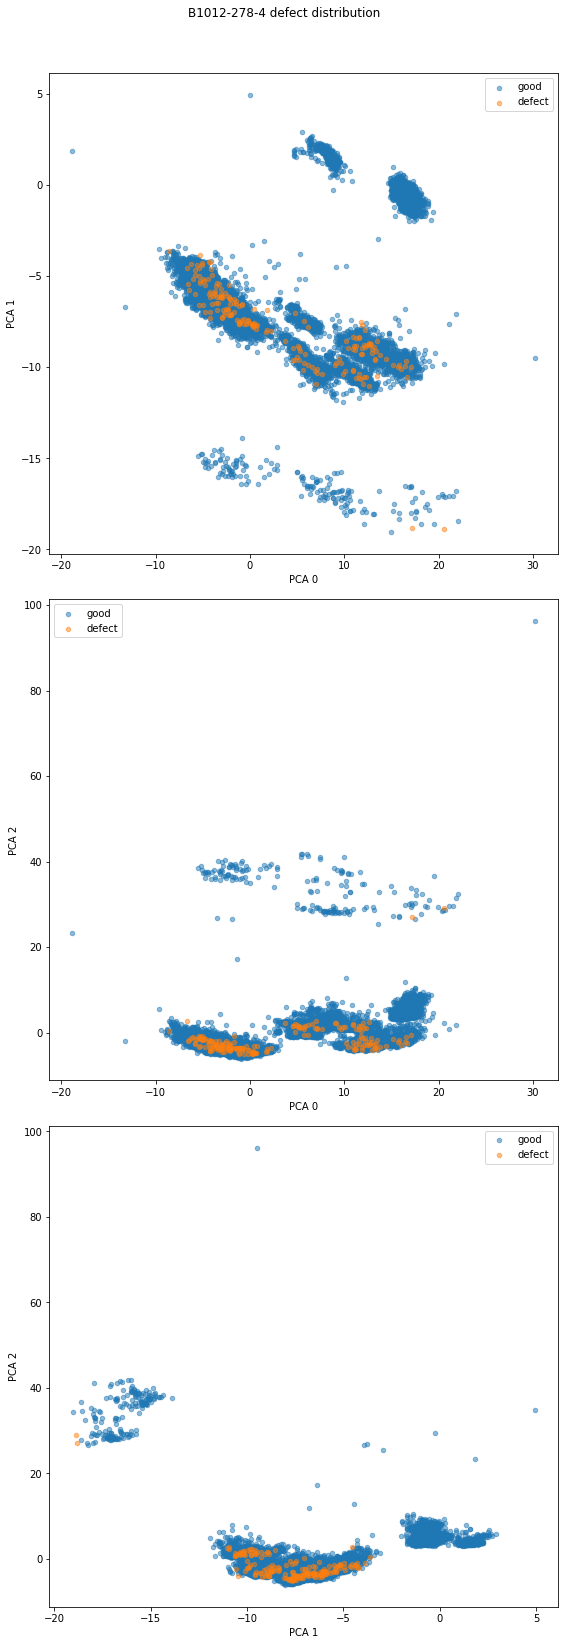

In [35]:
plot_individual_parts(transformed_features_df, part='B1012-278-4')

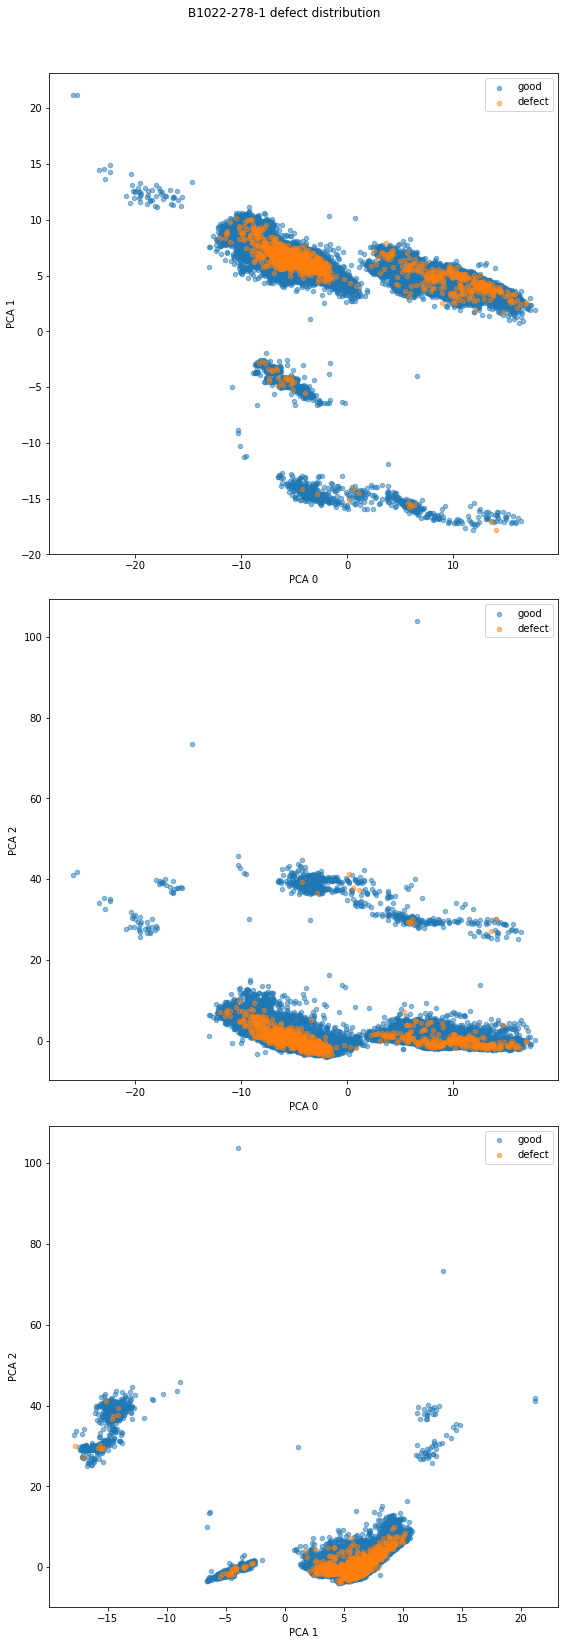

In [36]:
plot_individual_parts(transformed_features_df, part='B1022-278-1')

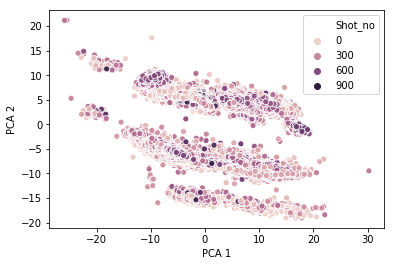

In [37]:
sns.scatterplot(data=transformed_features_df, x='PCA 1', y='PCA 2', hue='Shot_no', hue_norm=(0,900))

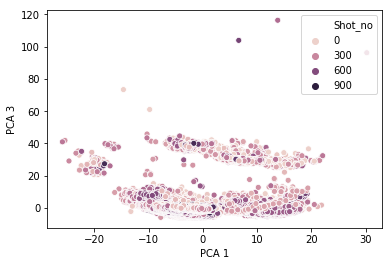

In [38]:
sns.scatterplot(data=transformed_features_df, x='PCA 1', y='PCA 3', hue='Shot_no', hue_norm=(0,900))

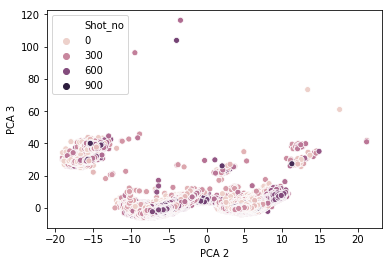

In [39]:
sns.scatterplot(data=transformed_features_df, x='PCA 2', y='PCA 3', hue='Shot_no', hue_norm=(0,900))